In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score, mean_absolute_error ,mean_squared_error
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('House_price.csv')

In [4]:
dataset = dataset.drop(labels = 'Address', axis = 1)

In [5]:
dataset.head()

,Avg. Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [26]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [8]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), axis = 1))

[[1550603.96 1599478.99]
 [ 855700.92  869026.58]
 [ 935895.38  911202.17]
 ...
 [1130868.35 1221827.82]
 [ 997408.41  863297.18]
 [ 603847.99  657169.3 ]]


In [44]:
print("R-Square Value",r2_score(y_test,y_pred))
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
# Plot the loss curve (mean squared error)
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.9251445985678679
mean_absolute_error : 79367.10965216269
mean_squared_error :  9923148318.120808
root_mean_squared_error :  99615.00046740354


In [43]:
# Evaluate the model
print("Train Accuracy:",regressor.score(X_train, y_train))

Train Accuracy: 0.6616243293839132


In [16]:
prediction=regressor.predict(X_test)

In [17]:
prediction

array([1550603.96,  855700.92,  935895.38, ..., 1130868.35,  997408.41,
        603847.99])

In [18]:
y_test

array([[1599478.99],
       [ 869026.58],
       [ 911202.17],
       ...,
       [1221827.82],
       [ 863297.18],
       [ 657169.3 ]])

In [19]:
regressor.score(X_train, y_train)

0.915806383901728

In [35]:
new_data={"Avg. Area Income":89545.45857,"House Age":6.682861,"Number of Rooms":8.009188,"Number of Bedrooms":5.09,"Area Population":33086.80050,}

In [49]:
new_data_df = pd.DataFrame([new_data])

predicted_price = regressor.predict(new_data_df)

C:\Users\abdel\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


<Axes: >

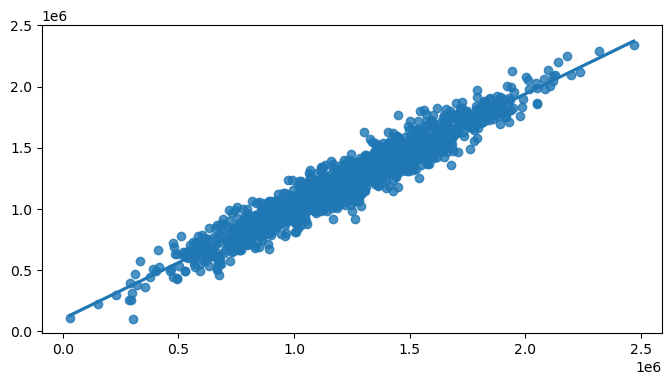

In [21]:
plt.figure(figsize=(8,4))
sns.regplot(x=y_test,y=prediction)

C:\Users\abdel\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\abdel\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\abdel\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


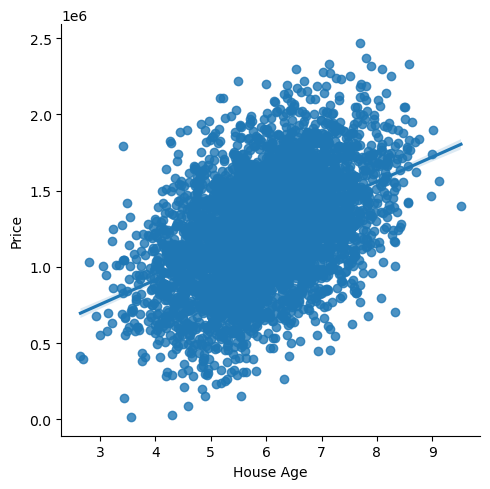

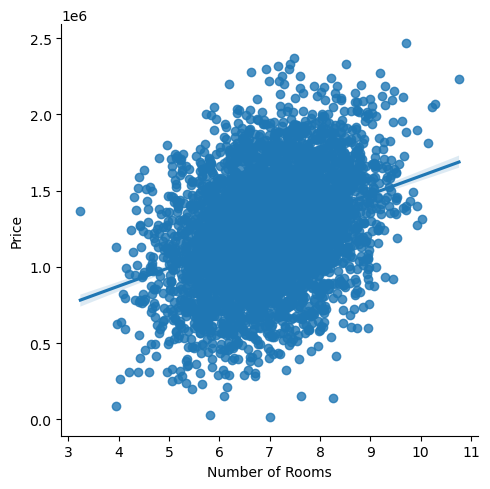

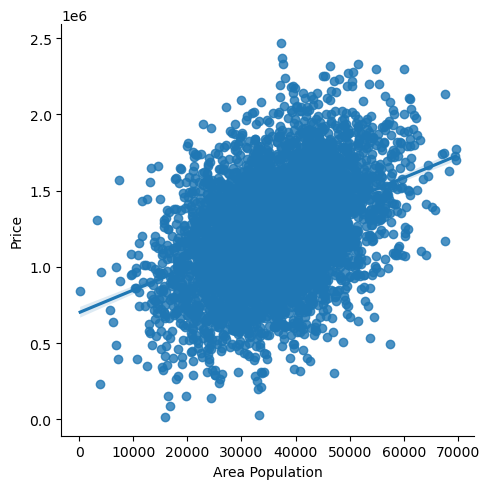

In [22]:
sns.lmplot(x='House Age',y='Price',data=dataset)
sns.lmplot(x='Number of Rooms',y='Price',data=dataset)
sns.lmplot(x='Area Population',y='Price',data=dataset)

In [35]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [36]:
prediction=knn.predict(X_test)

In [37]:
prediction

array([1580712.27,  930809.89,  900701.71, ..., 1000446.81,  550576.58,
        702887.75])

In [38]:
y_test

array([1599478.99,  869026.58,  911202.17, ..., 1221827.82,  863297.18,
        657169.3 ])

In [50]:
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R-squared: {r_squared:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

R-squared: 0.9251
Mean Absolute Error: 79367.1097
Mean Squared Error: 9923148318.1208
Root Mean Squared Error: 99615.0005


<function matplotlib.pyplot.show(close=None, block=None)>

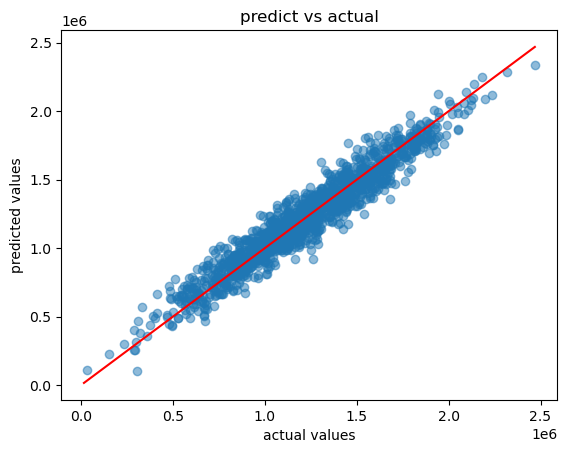

In [52]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.plot([y.min(),y.max()],[y.min(),y.max()],color="red")
plt.xlabel("actual values")
plt.ylabel("predicted values")
plt.title("predict vs actual")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

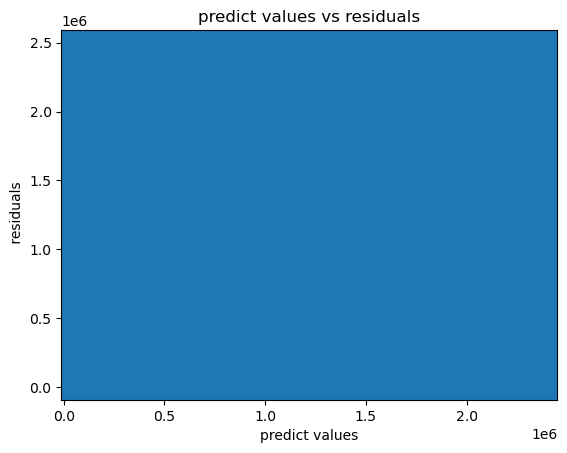

In [54]:
plt.scatter(y_pred,y_test,y_pred, alpha=0.5)
plt.xlabel("predict values")
plt.ylabel(" residuals")
plt.title("predict values vs residuals")
plt.show